In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
evaluation_data = pd.read_csv('./results/results_17_05_2022_23_16_23.csv')

# Results Analysis

In [3]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
evaluation_data.head(10)

,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time (s),LastTokenQuery,EquivalenceQuery,OT Prefixes,OT Suffixes,Tree Depth,Inner Nodes,LogProbError,WER,NDCG,OOPartition,OOTolerance,AbsoluteError
0,WLStarLearner,PDFA - c0e8bea6e5324b5387bd0371a18ad0b5,93,93,1,2.830932,1551,6,195.0,8.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
1,WLStarLearner,PDFA - c0e8bea6e5324b5387bd0371a18ad0b5,93,93,2,2.780522,1551,6,195.0,8.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
2,WLStarLearner,PDFA - c0e8bea6e5324b5387bd0371a18ad0b5,93,93,3,2.752699,1551,6,195.0,8.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
3,WLStarLearner,PDFA - c0e8bea6e5324b5387bd0371a18ad0b5,93,93,4,2.802535,1551,6,195.0,8.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
4,WLStarLearner,PDFA - c0e8bea6e5324b5387bd0371a18ad0b5,93,93,5,2.780880,1551,6,195.0,8.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
5,WLStarLearner,PDFA - c0e8bea6e5324b5387bd0371a18ad0b5,93,93,6,2.768208,1551,6,195.0,8.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
6,WLStarLearner,PDFA - c0e8bea6e5324b5387bd0371a18ad0b5,93,93,7,2.771105,1551,6,195.0,8.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
7,WLStarLearner,PDFA - c0e8bea6e5324b5387bd0371a18ad0b5,93,93,8,2.818690,1551,6,195.0,8.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
8,WLStarLearner,PDFA - c0e8bea6e5324b5387bd0371a18ad0b5,93,93,9,2.794647,1551,6,195.0,8.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
9,WLStarLearner,PDFA - 44e27cc705a24b60bd696abf4afdbd6c,102,102,1,3.124994,1524,5,219.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0


In [5]:
import math
evaluation_data['OT_SIZE'] = evaluation_data['OT Prefixes']*evaluation_data['OT Suffixes']
evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']
evaluation_data['STRUCTURE_SIZE'] = evaluation_data.apply(lambda row : row['TREE_SIZE'] if math.isnan(row['OT_SIZE']) else row['OT_SIZE'], axis = 1)

In [6]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

funcs =  ['median', IQR]    
grouped_multiple = evaluation_data.groupby(['Algorithm', 'Number of States']).agg({'Time (s)':funcs, 'LastTokenQuery':funcs, 'EquivalenceQuery':funcs, 'LogProbError':funcs,'WER':funcs,'NDCG':funcs,'OOPartition':funcs, 'OOTolerance':funcs, 'Extracted Number of States':funcs, 'STRUCTURE_SIZE':funcs, 'AbsoluteError': funcs})
grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'LogProbError_median','LogProbError_IQR',
'WER_median','WER_IQR','NDCG_median','NDCG_IQR','OOPartition_median','OOPartition_IQR', 'OOTolerance_median','OOTolerance_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR', 'STRUCTURE_SIZE_median', 'STRUCTURE_SIZE_IQR', 'AbsoluteError_median', 'AbsoluteError_IQR']
grouped_multiple.reset_index(inplace = True)

In [7]:
grouped_multiple

,Algorithm,Number of States,Time(s)_median,Time(s)_IQR,MembershipQuery_median,MembershipQuery_IQR,EquivalenceQuery_median,EquivalenceQuery_IQR,LogProbError_median,LogProbError_IQR,...,OOPartition_median,OOPartition_IQR,OOTolerance_median,OOTolerance_IQR,Extracted Number of States_median,Extracted Number of States_IQR,STRUCTURE_SIZE_median,STRUCTURE_SIZE_IQR,AbsoluteError_median,AbsoluteError_IQR
0,QuantNaryTreeLearner,88,1.461282,0.045200,1002.0,0.0,34.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,88.0,0.0,120.0,0.0,0.0,0.0
1,QuantNaryTreeLearner,92,1.700934,0.032812,1077.0,162.0,40.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,92.0,0.0,130.0,2.0,0.0,0.0
2,QuantNaryTreeLearner,93,1.659944,0.065974,1062.0,0.0,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,93.0,0.0,131.0,0.0,0.0,0.0
3,QuantNaryTreeLearner,99,1.670559,0.094136,1080.0,0.0,34.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,99.0,0.0,131.0,0.0,0.0,0.0
4,QuantNaryTreeLearner,102,1.764056,0.128577,1101.0,0.0,37.5,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,102.0,0.0,137.5,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,WLStarLearner,303,104.726001,1.292757,3657.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,303.0,0.0,3666.0,0.0,0.0,0.0
74,WLStarLearner,305,114.092310,1.215956,4338.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,305.0,0.0,4347.0,0.0,0.0,0.0
75,WLStarLearner,307,125.425467,0.376888,3741.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,307.0,0.0,3750.0,0.0,0.0,0.0
76,WLStarLearner,310,114.386805,1.035280,4492.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,310.0,0.0,4501.0,0.0,0.0,0.0


In [8]:
len(grouped_multiple)

78

Text(0, 0.5, 'Learning Time Median (s)')

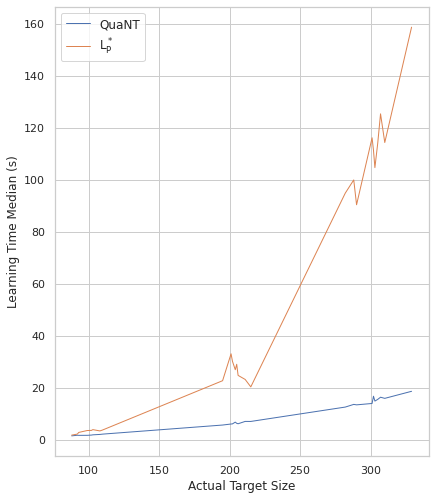

In [9]:
grouped_multiple["LOG_Time(s)_median"] = np.log(grouped_multiple["Time(s)_median"])
grouped_multiple = grouped_multiple.loc[grouped_multiple["Algorithm"] != 'WLStarColLearner' ]

import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
#plt.legend(labels=["QuaNT","$\mathrm{L_{P}^*Col}$", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Learning Time Median (s)", fontsize = 12)

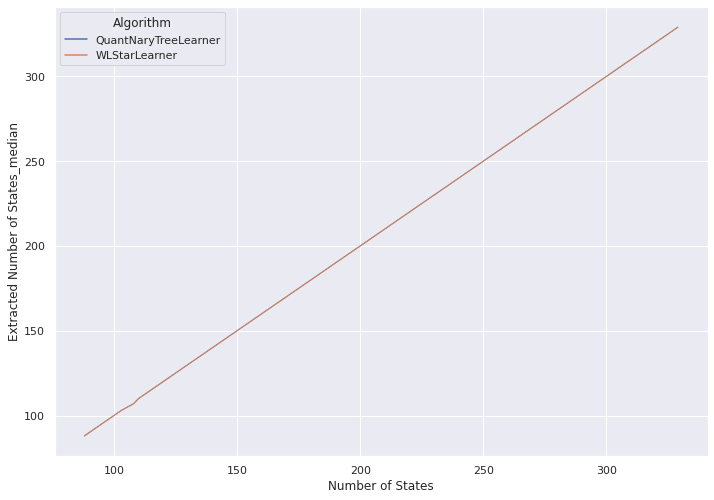

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="Number of States", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)

Text(0, 0.5, 'Speedup')

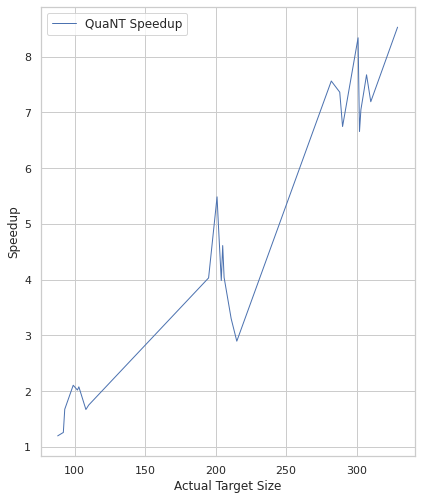

In [13]:
times_QuaNT = np.array(grouped_multiple["Time(s)_median"][0:26])
times_WLStar = np.array(grouped_multiple["Time(s)_median"][26:])
speedup_Q_WL = times_WLStar / times_QuaNT
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})

sns.set_style("whitegrid")
ax = sns.lineplot(x=grouped_multiple['Number of States'][0:26], y=speedup_Q_WL,  linewidth=1)
plt.legend(labels=["QuaNT Speedup"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)

Text(0, 0.5, 'Structure Size Median')

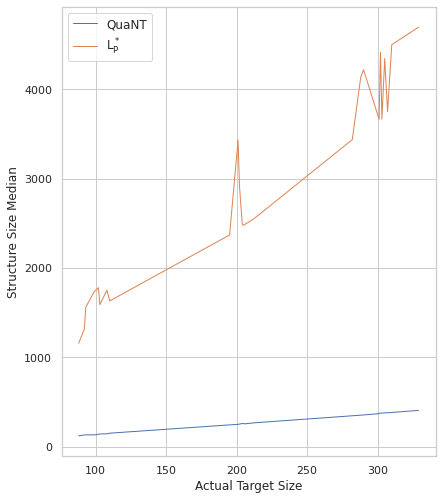

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="STRUCTURE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Structure Size Median", fontsize = 12)